In [3]:
import os
from tqdm import tqdm
import re
import pandas as pd

In [4]:
test_personal_info = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/1.personal_info.csv')

In [5]:
fdispositives = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/2.dispositives.csv')

In [6]:
test_locations = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/3.locations.csv')

In [7]:
ffavorites = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/4.favorites.csv')

In [8]:
fhistory = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/4.history.csv')

In [47]:
test_music = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/5.music.csv')

In [10]:
fmail = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/6.mail.csv')

In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 1. Personal Info

In [11]:
test_personal_info.head(1)

,Google Account ID,Created on,IP,Language,e-mail,recovery mail,name,gender,phone_,country
0,907204290308,2017-07-20 08:00:00,213.4.207.110,es,jrdiazordaz03@gmail.com,IronhideX1@gmail.com,Jose Diaz,male,34615686348,ES


In [12]:
add = ['927404598308', '2012-03-15 05:00:00', '77.2.107.010', 'es', 'ironhacker@gmail.com', 'recovery@gmail.com', 'John Doe', 'male', '34622553343', 'ES']

In [69]:
categories = ['Google Account ID',
              'Created on', 'IP',
              'Language', 'e-mail', 
              'recovery mail', 'name', 
              'gender', 'phone', 'country']

In [70]:
fpersonal_info = pd.DataFrame(add, categories)

In [71]:
fpersonal_info

,0
Google Account ID,927404598308
Created on,2012-03-15 05:00:00
IP,77.2.107.010
Language,es
e-mail,ironhacker@gmail.com
recovery mail,recovery@gmail.com
name,John Doe
gender,male
phone,34622553343
country,ES


In [72]:
fpersonal_info.rename(columns = {0:'Fields'}, inplace=True)

In [73]:
fpersonal_info.head(10)

,Fields
Google Account ID,927404598308
Created on,2012-03-15 05:00:00
IP,77.2.107.010
Language,es
e-mail,ironhacker@gmail.com
recovery mail,recovery@gmail.com
name,John Doe
gender,male
phone,34622553343
country,ES


In [75]:
fpersonal_info.to_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/1.fpersonal_info.csv', index=True)

In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 2. Dispositives

In [17]:
fdispositives.shape

(1989933, 22)

In [18]:
len(fdispositives['IP Address'].unique())

49

In [19]:
len(fdispositives['Title'].unique())

33

In [20]:
fdispositives.drop(columns=(['Gaia ID', 'Activity Region', 'Activity City', 'User Agent String', 'Product Name',
                            'Sub-Product Name', 'Marketing Name', 'OS', 'OS Version', 'Model', 'CarrierName', 'Manufacturer',
                            'UpdateTime', 'Brand Name', 'From', 'Device Type', 'Activity Country', 'InstallationTime',
                            'Device Last Location']), inplace=True)

In [21]:
fdispositives.head(1)

,Activity Timestamp,IP Address,Title
0,2021-12-05 07:57:48 UTC,89.130.89.27,Meep - Rutas personalizadas


In [56]:
fdispositives.to_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/2.fdispositives.csv', index=False)

In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 3. Locations

In [23]:
test_locations.head()

,coordinates,name,address,date
0,"[-3.6396805999999997, 40.5392152]",Casa,"Calle del Pintor Murillo, 4, 28100 Alcobendas,...",NaN
1,"[-3.7046802, 40.4792542]",Trabajo,"Av. de Monforte de Lemos, Madrid, España",NaN
2,"[10.7349734, 59.9179351]",Thon Hotel Europa,"St. Olavs Gate 31, 0166 Oslo, Noruega",2019-09-26T10:57:03Z
3,"[10.7339016, 59.9185713]","Radisson Blu Scandinavia Hotel, Oslo","Holbergs gate 30, 0166 Oslo, Noruega",2019-09-26T10:56:31Z
4,"[10.7367862, 59.9177177]",Smarthotel Oslo,"St. Olavs Gate 26, 0166 Oslo, Noruega",2019-09-26T10:56:04Z


In [24]:
coordinates = ["40.387707, -3.717213", "40.388936, -3.699915",
               '48.850356, 2.309419', '53.553156, 9.986458', '53.561366, 9.967612',
              '35.682157, 139.757116', '35.882216, 128.607326', '-31.873469, 23.477072']
name = ['C. de Antonio de Leyva, 84, 28019 Madrid', 'Bar La Alegria',
        'Vla de Ségur, 75007 Paris, France', 'Hohe Bleichen 7, Hamburg, Germany', 
        'Kampstraße 15 20357 Hamburg, Germany', '2 Kōkyogaien Chiyoda City, Tokyo 100-0002, Japón',
       'Daehyeonnam-ro 9-gil Buk-gu, Daegu, Corea del Sur', 'Central Karoo DC South Africa']
date = ['2019-09-26', '2016-03-20', '2017-05-16', '2012-08-21', '2018-01-02', '2021-02-07', '2020-01-04', '2014-04-10']
time = ['10:57:03', '12:53:03', '02:03:03', '11:01:01', '15:04:03', '18:05:11', '19:10:30', '21:34:31']

In [27]:
flocations = pd.DataFrame(data=(coordinates, name, date, time)).T

In [76]:
flocations.head(1)

,coordinates,name,date,time
0,"40.387707, -3.717213","C. de Antonio de Leyva, 84, 28019 Madrid",2019-09-26,10:57:03


In [36]:
flocations.rename(columns={0:'coordinates', 1:'name', 2:'date', 3:'time'}, inplace=True)

In [80]:
lat = []
long = []
for x in flocations['coordinates']:
    lat.append(str(x).split(', ')[0])
    long.append(str(x).split(', ')[1])

In [84]:
flocations['lat'] = lat
flocations['long'] = long

In [87]:
flocations.head(1)

,coordinates,name,date,time,lat,long
0,"40.387707, -3.717213","C. de Antonio de Leyva, 84, 28019 Madrid",2019-09-26,10:57:03,40.387707,-3.717213


In [91]:
s = pd.Series(lat)
k = pd.Series(long)
pd.to_numeric(s)
pd.to_numeric(k)

0     -3.717213
1     -3.699915
2      2.309419
3      9.986458
4      9.967612
5    139.757116
6    128.607326
7     23.477072
dtype: float64

In [92]:
flocations.to_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/3.locations.csv', index=False)

# 4. Favorites / History

In [15]:
ffavorites.head(1)

,url,date2,description
0,https://www.youtube.com/watch?v=U6WnHQ6I7tM,2020-01-13 21:55:10,<title>¿Sabes lo que te digo? - YouTube</title>


In [99]:
titles = []
for i in range(len(ffavorites['description'])):
    titles.append((ffavorites['description'][i]).replace('<title>', '').replace('</title>', '').replace('YoTube', ''))

In [100]:
ffavorites['desc'] = titles

In [104]:
ffavorites.to_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/output/npl_favorites.csv', index=False)

In [16]:
fhistory.head(1)

,page_transition,title,month,hour,day_of_week,weekday,domain,date,time
0,LINK,Horarios de autobús 151: Madrid (Plaza Castill...,12,0,Monday,Y,redtransporte,2021-12-06,08:58:11.719312


# 5. Music

In [48]:
test_music.drop(columns=(['album', 'countries', 'channel', 'categoryId', 'islive', 'disc_number', 'explicit', 'track_number']), inplace=True)

In [49]:
test_music.head(1)

,title,artist,duration_ms,popularity,lyrics
0,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,291293,83,huh yeah woo hey yeah huh ooh yeah uh huh yea...


In [50]:
test_music_1 = test_music.copy()

In [51]:
test_music_1.drop(columns=(['lyrics']), inplace=True)

,title,artist,duration_ms,popularity,lyrics
0,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,291293,83,huh yeah woo hey yeah huh ooh yeah uh huh yea...


# 6. Mail

In [18]:
fmail.head(1)

,from,to,Time,date,body,quarter
0,provomad@cruzroja.es,jrdiazordaz03@gmail.com,00:57:23,2021-12-03,estimado jose ramon: los próximos días 14...,FA


# Wordclouds

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
favs = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/2.npl_favorites.csv')

In [116]:
musi = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/5.npl_music.csv')

In [118]:
mail = pd.read_csv('/mnt/c/Ironhack/Material/Repositorio/Final/data/test/tableau/7.npl_mail.csv')

In [113]:
def wordcloud_df(df, col):
    """
    La dejo hecha porque es igual que la otra y me interesa el resultado, solo cambia el join
    """
    wordcloud = WordCloud(width=1600,height=400).generate(" ".join([e for e in df[col]]))
    plt.figure(figsize=(15,10), facecolor="k")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('images/wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.show();

In [120]:
!pip install googletrans==3.1.0a0

  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1


In [1]:
from googletrans import Translator

ModuleNotFoundError: No module named 'googletrans'

FileNotFoundError: [Errno 2] No such file or directory: 'images/wordcloud.png'

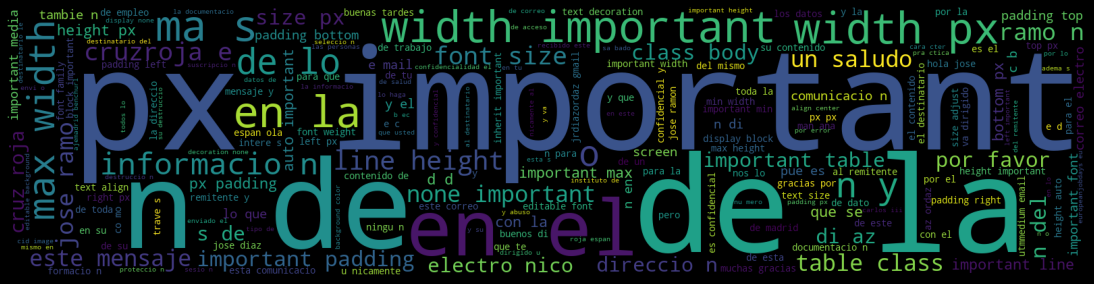

In [119]:
wordcloud_musi = wordcloud_df(mail,"lyrics")